## Task2 - Prediction Using Decision Tree Alogrithm
## By Nishara Sujit


### Task - We have to create a decision tree classifier and visualize it graphically. Also, if we feed any new data to this classifier it should predict the right class accordingly. 

In [1]:
#lets start with importing the required libraries

import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
#lets load the data and inspect the head

df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#lets inspect the various aspects of our dataframe
df.shape

(150, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
#lets check if there is any missing data

df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

The data is clean. There are no missing values. lets move ahead to build the model


In [7]:
#lets put the feature variable to X, and response variable to y

X = df.drop(['Species', 'Id'], axis=1)
y = df['Species']

In [8]:
#lets split the data into test and train

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, train_size =0.8, random_state=100)

In [9]:
#lets check the shape of X_train and X_test
X_train.shape, X_test.shape

((120, 4), (30, 4))

In [10]:
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
81,5.5,2.4,3.7,1.0
99,5.7,2.8,4.1,1.3
119,6.0,2.2,5.0,1.5
12,4.8,3.0,1.4,0.1
16,5.4,3.9,1.3,0.4


In [11]:
#lets fit the Decision tree

from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth = 3)
dtree.fit(X_train,y_train)

print('Decision Tree Classifier Created')

Decision Tree Classifier Created


In [12]:
#importing the packages for visualization

from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

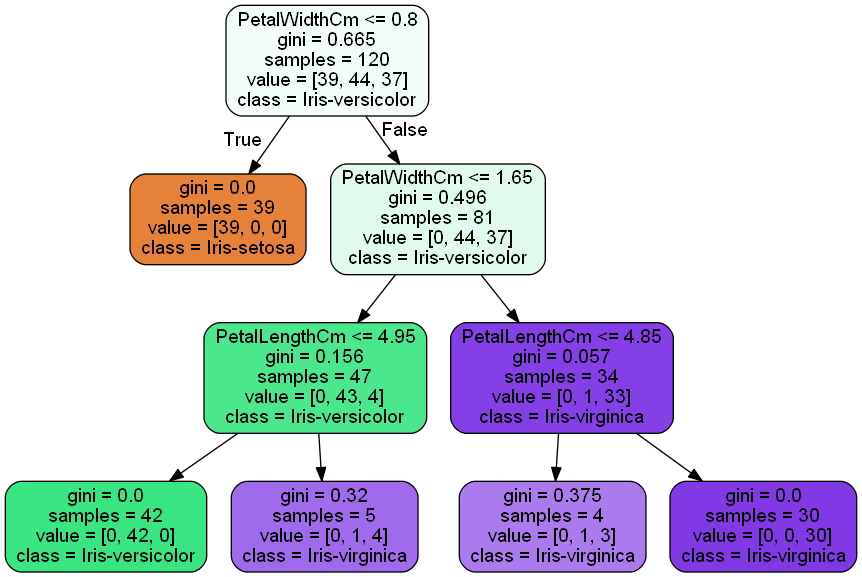

In [13]:
#plotting the tree
dot_data = StringIO()

export_graphviz(dtree, out_file=dot_data, filled=True, rounded=True, feature_names=X.columns, class_names = ['Iris-setosa','Iris-versicolor','Iris-virginica'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [14]:
#lets evaluate the model performance

y_test_pred = dtree.predict(X_test)

In [15]:
Predicted = pd.DataFrame({'Actual': y_test, 'Predicted':y_test_pred})
Predicted.head(10)

,Actual,Predicted
128,Iris-virginica,Iris-virginica
11,Iris-setosa,Iris-setosa
118,Iris-virginica,Iris-virginica
15,Iris-setosa,Iris-setosa
123,Iris-virginica,Iris-virginica
135,Iris-virginica,Iris-virginica
32,Iris-setosa,Iris-setosa
1,Iris-setosa,Iris-setosa
116,Iris-virginica,Iris-virginica
45,Iris-setosa,Iris-setosa


In [16]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_test_pred))

0.9666666666666667


In [17]:
#lets check if the model predicts the right class for new data

data = [[5.3,3.4,5.2,4.8]]
result = dtree.predict(data)

print('The class is', result[0])

The class is Iris-virginica


### Inference

Decision tree classifier has been created and visualized graphically with an accuracy score of 0.966. Also, the decision tree has successfully predicted the right class for any new data.